Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the titanicset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

titanic

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18




In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Text(0, 0.5, 'Min and Max temp')

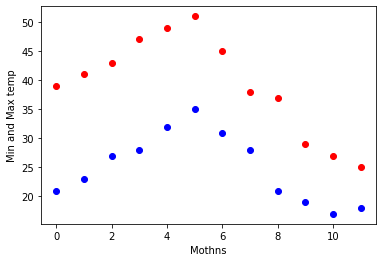

In [4]:
maxi = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
mini = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, maxi, 'ro')
plt.plot(months, mini, 'bo')
plt.xlabel('Mothns')
plt.ylabel('Min and Max temp')

In [5]:
from scipy import optimize

/Users/devesh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/devesh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/devesh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
def year_temp(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(year_temp, months,
                                      maxi, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(year_temp, months,
                                      mini, [-40, 20, 0])

Text(0, 0.5, 'Temperature ($^\\circ$C)')

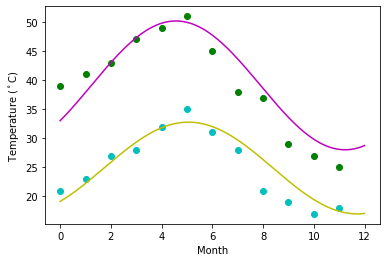

In [10]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, maxi, 'go')
plt.plot(days, year_temp(days, *res_max), 'm-')
plt.plot(months, mini, 'co')
plt.plot(days, year_temp(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

Matplotlib:
This assignment is for visualization using matplotlib:
titanic to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-titanic/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/devesh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-titanic/master/titanic_original.csv')
titanic.head()

In [20]:
titanic.shape

(1310, 14)

In [26]:
size = titanic['sex'].value_counts()
size

male      843
female    466
Name: sex, dtype: int64

In [22]:
titanic.dropna(subset=['sex'], inplace=True)

In [23]:
titanic.shape

(1309, 14)

In [27]:
labels = ['male', 'female']

(-1.1129882387529657,
 1.100618487559665,
 -1.115396545532452,
 1.1087172584473963)

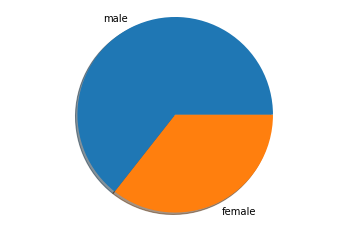

In [39]:
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, shadow=True)
ax1.axis('equal')

In [46]:
titanic.fillna(value=0, inplace=True)

In [47]:
titanic.fillna(method='ffill', inplace=True)

In [48]:
titanic['fare'].isnull().sum()

0

In [49]:
titanic['age'].isnull().sum()

0

<Figure size 432x288 with 0 Axes>

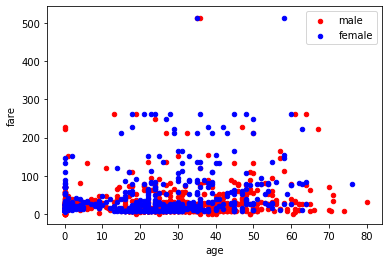

In [52]:
plt.figure()
c1=titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='red', label='male')
c2=titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='blue', label='female', ax=c1)